# Boston Housing data
This part of the tutorial loads data about Boston housing and median house prices. The goal is to predict the housing price in each district given a series of features.

Features include race, air quality and plot size.

In [1]:
# Load the data
boston = load_boston()
X_train = boston["data"][:100]
y_train = boston["target"][:100]
X_test = boston["data"][100:]
y_test = boston["target"][100:]

all_features = boston["feature_names"]


NameError: name 'load_boston' is not defined

In [75]:
# WE are using numpy sklearn for these examples
'''
import numpy as np
from sklearn import linear_model
from collections import defaultdict
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import StandardScaler

# ALLOW inline graphs
%matplotlib inline

boston = load_boston()
X_train = boston["data"][:100]
y_train = boston["target"][:100]
X_test = boston["data"][100:]
y_test = boston["target"][100:]

all_features = boston["feature_names"]
print str(all_features)
print len(X_train)
clf = linear_model.LinearRegression()
clf.fit (X_train, y_train)
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
rf.fit(X_train, y_train)


print('Variance score: %.2f' % clf.score(X_test, y_test))
print('Variance score: %.2f' % rf.score(X_test, y_test))
'''

'\nimport numpy as np\nfrom sklearn import linear_model\nfrom collections import defaultdict\nfrom sklearn.datasets import load_boston\nfrom sklearn.metrics import r2_score\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.cross_validation import ShuffleSplit\nfrom sklearn.preprocessing import StandardScaler\n\n# ALLOW inline graphs\n%matplotlib inline\n\nboston = load_boston()\nX_train = boston["data"][:100]\ny_train = boston["target"][:100]\nX_test = boston["data"][100:]\ny_test = boston["target"][100:]\n\nall_features = boston["feature_names"]\nprint str(all_features)\nprint len(X_train)\nclf = linear_model.LinearRegression()\nclf.fit (X_train, y_train)\nrf = RandomForestRegressor(n_estimators=20, max_depth=4)\nrf.fit(X_train, y_train)\n\n\nprint(\'Variance score: %.2f\' % clf.score(X_test, y_test))\nprint(\'Variance score: %.2f\' % rf.score(X_test, y_test))\n'

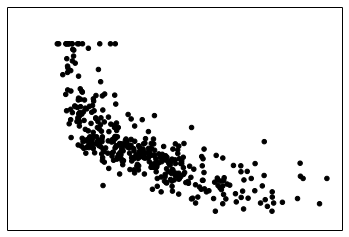

In [76]:
import matplotlib.pyplot as plt

# LET's plot it
import matplotlib.pyplot as plt
idx = list(all_features).index('LSTAT')
plt.scatter([x[idx] for x in X_test], y_test,  color='black')

plt.xticks(())
plt.yticks(())

plt.show()


#housing.main()

In [77]:
X = boston["data"]
Y = boston["target"]
 
rf = RandomForestRegressor()
scores = defaultdict(list)
 
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print "Features sorted by their score:"
sorted_features = sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True)
print sorted_features
good_features = [x[1] for x in sorted_features]
X_selected = []
for line in X_train:
    x_out = []
    feature_num = 0
    for feature_name in all_features:
        if feature_name in good_features:
            x_out.append(line[feature_num])
        feature_num += 1
    X_selected.append(x_out)
print good_features

# SCALE it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected)

clf = linear_model.LinearRegression()
clf.fit (X_selected, Y_train)

print('Variance score: %.2f' % clf.score(X_selected, Y_train))


# LET'S try scaling the data
clf_scaled = linear_model.LinearRegression()
clf_scaled.fit (X_train_scaled, Y_train)
print('Variance score: %.2f' % clf_scaled.score(X_train_scaled, Y_train))



Features sorted by their score:
[(0.7401, 'LSTAT'), (0.5497, 'RM'), (0.0832, 'DIS'), (0.0407, 'NOX'), (0.0374, 'CRIM'), (0.0218, 'PTRATIO'), (0.017, 'TAX'), (0.0106, 'AGE'), (0.0055, 'INDUS'), (0.0047, 'B'), (0.0045, 'RAD'), (0.0004, 'CHAS'), (-0.0001, 'ZN')]
['LSTAT', 'RM', 'DIS', 'NOX', 'CRIM', 'PTRATIO', 'TAX', 'AGE', 'INDUS', 'B', 'RAD', 'CHAS', 'ZN']
Variance score: 0.74
Variance score: 0.74
